# Researching the data
First have a look at the data and see what we have to work with.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

train_ds = pd.read_csv('data/train.csv')

# Data description
Define all columns and the type of feature they are, numerical or categorical or ordinal.
* Danceability: Numerical feature - a measure from 0 to 10 describing how suitable a track is for dancing.
* Track: string feature - name of the song, as visible on the Spotify platform.
* Artist: string feature - name of the artist.
* Composer: string feature - name of the composer.
* Album: string feature - the album in which the song is contained on Spotify.
* Channel: string feature - name of the channel that has published the video.
* Title: string feature - title of the video clip on YouTube.
* Album_type: Categorical feature - indicates if the song is released on Spotify as a single or contained in an album.
* Key: Categorical feature - the key the track is in, mapped to pitches using standard Pitch Class notation.
* Licensed: Categorical feature - indicates whether the video represents licensed content.
* official_video: Categorical feature - boolean value that indicates if the video found is the official video of the song.
* Energy: Numerical feature - a measure from 0.0 to 1.0 representing the perceptual measure of intensity and activity.
* Loudness: Numerical feature - the overall loudness of a track in decibels (dB).
* Speechiness: Numerical feature - detects the presence of spoken words in a track.
* Acousticness: Numerical feature - a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* Instrumentalness: Numerical feature - predicts whether a track contains no vocals.
* Liveness: Numerical feature - detects the presence of an audience in the recording.
* Valence: Numerical feature - a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* Tempo: Numerical feature - the overall estimated tempo of a track in beats per minute (BPM).
* Duration_ms: Numerical feature - the duration of the track in milliseconds.
* Stream: Numerical feature - number of streams of the song on Spotify.
* Views: Numerical feature - number of views.
* Likes: Numerical feature - number of likes.
* Comments: Numerical feature - number of comments.
* Description: string feature - description of the video on YouTube.

In [53]:
label_feature = 'Danceability'
numerical_features = ['Energy', 'Loudness', 'Speechiness', 'Acousticness',
                      'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream',
                      'Views', 'Likes', 'Comments']

categorical_features = ['Album_type', 'Key', 'Licensed', 'official_video']

string_features = [
    'Track', 'Artist', 'Composer', 'Album', 'Title', 'Channel', 'Description'
]

columns = [label_feature] + numerical_features + categorical_features + string_features

# Nan values percentage
for each columns we find the percentage of Nan values

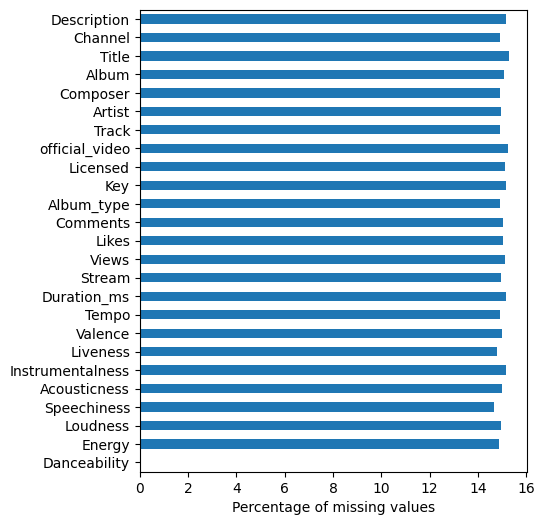

In [54]:
(train_ds[columns].isna().sum() / len(train_ds) * 100).plot.barh()
plt.gcf().set_size_inches(5, 6)  # Set figure size
plt.xlabel("Percentage of missing values")
plt.show()


solution of missing values
1. add binary variable for each feature to indicate rather the value is missing
2. train a model to predict missing values

# Distribution of each features

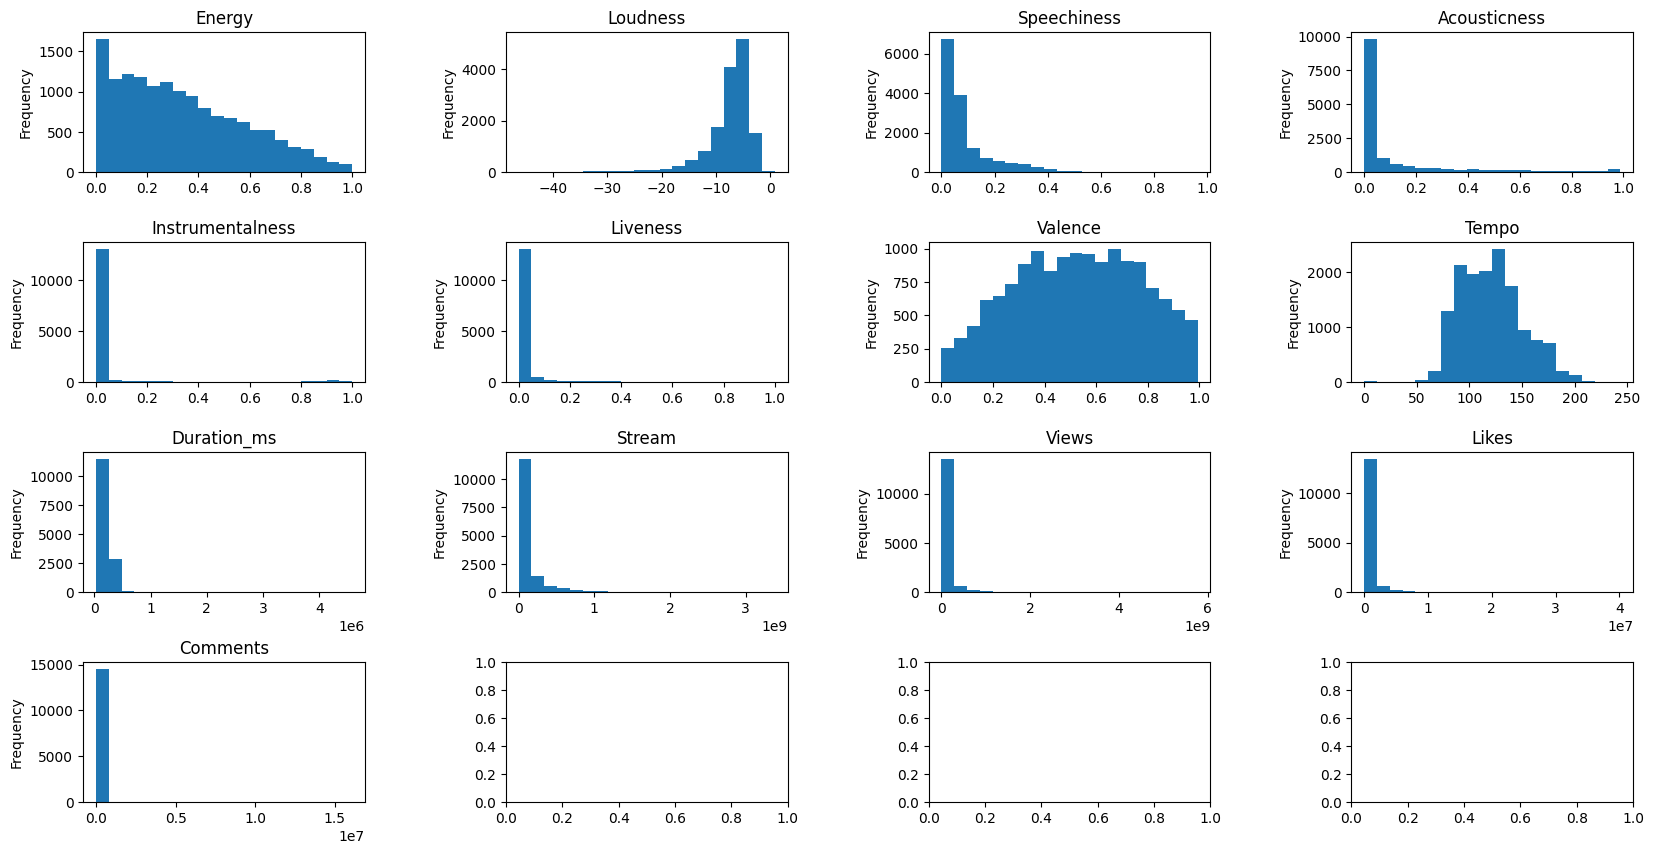

In [55]:
# plot distribution of numerical features
def plot_distribution(df, features):
    fig, axes = plt.subplots(4, 4, figsize=(20, 10))
    axes = axes.flatten()
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, feature in enumerate(features):
        df[feature].plot.hist(ax=axes[i], bins=20)
        axes[i].set_title(feature)
    plt.show()
    
plot_distribution(train_ds, numerical_features)

In [56]:
skewed_features = ['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                    'Liveness', 'Duration_ms', 'Stream', 'Views', 'Likes', 'Comments']
normal_features = ['Valence', 'Tempo']

# Normalize numerical feastures

In [60]:
# Initialize the StandardScaler object
normal_transformer = StandardScaler()
skewed_transformer = PowerTransformer()

# Fit the scaler on your training dataset
normal_transformer.fit(train_ds[normal_features])
skewed_transformer.fit(train_ds[skewed_features])

# Normalize the numerical features in the training dataset
trainsformed_train_ds = train_ds.copy()
trainsformed_train_ds[normal_features] = normal_transformer.transform(train_ds[normal_features])
trainsformed_train_ds[skewed_features] = skewed_transformer.transform(train_ds[skewed_features])

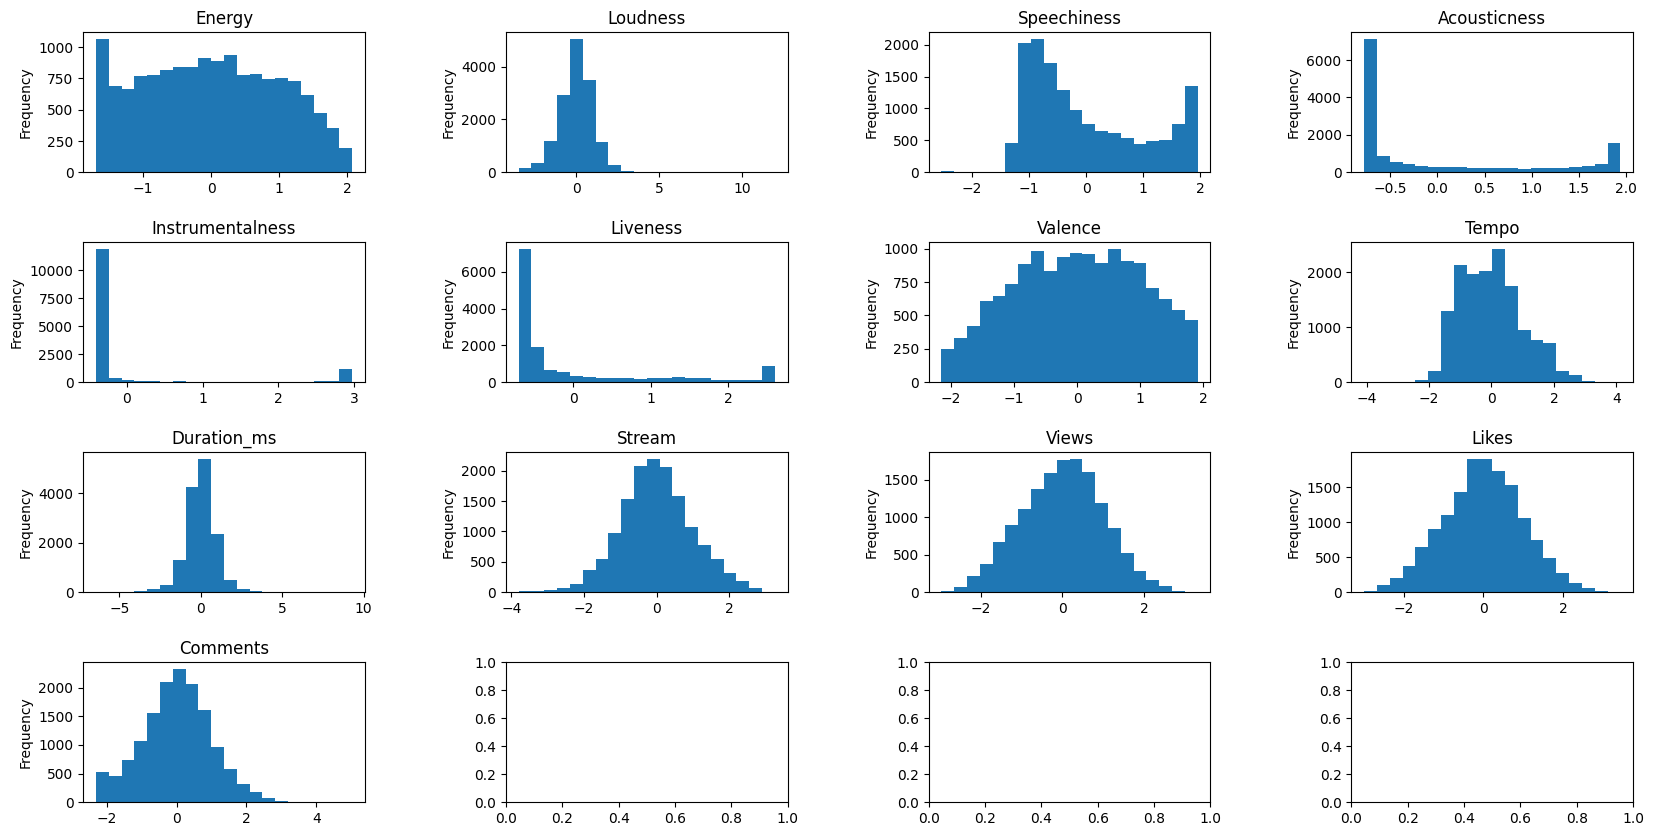

In [61]:
plot_distribution(trainsformed_train_ds, numerical_features)